<a id='Top of document'></a>

# Titanic Disaster: Survivability Parameters

* [Problem Statement](#probstate)
* [Dataset Exploration](#dataexp)
    * [Dataset Plots](#dataplots)
* [Age](#age)
    * [Age Histogram Comparison](#age_hist)
    * [Age Mosaic](#age_mosaic)
* [Pclass](#pclass)
* [Sex](#sex)
* [Embarked](#embarked)
* [Statistics](#statistics)

In [1]:
# Analysis performed with Python 3.5.1

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
%pylab inline

script_dir = os.getcwd()
file = "titanic_data.csv"
abs_file_path = os.path.join(script_dir, file)

titanic_df = pd.read_csv(abs_file_path)

Populating the interactive namespace from numpy and matplotlib


[Back to top](#Top of document)
<a id='probstate'></a>

## Problem Statement

* [Dataset Description](https://www.kaggle.com/c/titanic/data)
* Using data analysis methods, predict which metric or combination of metrics best predict passenger survivability.
* A combination of data visualizations and statistics will be used to determine the most significant predictors of survivability.

[Back to top](#Top of document)
<a id='dataexp'></a>

## Dataset Exploration

In [2]:
# Head of the dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Tail of the dataset
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
# Determine which parameters have missing values
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


* Name, SibSp, Parch, Ticket and Fare will not be used
* Cabin will not be used because less the 25% of passengers have cabin data
* Missing Age data will be filled in the [Age](#age) section
* Missing Embarked data will be ignored

In [5]:
# Give gender a numeric value; 0 = male, 1 = female
titanic_df['Sex_Numeric'] = (titanic_df['Sex'].astype('category')).cat.codes

In [6]:
grouped_survived = titanic_df.groupby(['Sex_Numeric', 'Pclass', 'Age', 'Embarked'])

In [7]:
grouped_survived['Survived'].describe()

Sex_Numeric  Pclass  Age   Embarked       
0            1       2.0   S         count    1.0
                                     mean     0.0
                                     std      NaN
                                     min      0.0
                                     25%      0.0
                                     50%      0.0
                                     75%      0.0
                                     max      0.0
                     14.0  S         count    1.0
                                     mean     1.0
                                     std      NaN
                                     min      1.0
                                     25%      1.0
                                     50%      1.0
                                     75%      1.0
                                     max      1.0
                     15.0  S         count    1.0
                                     mean     1.0
                                     std      NaN
       

In [8]:
# Create Survival Label Column
titanic_df['Survival'] = titanic_df.Survived.map({0 : 'Died', 1 : 'Survived'})
titanic_df.Survival.head()

0        Died
1    Survived
2    Survived
3    Survived
4        Died
Name: Survival, dtype: object

In [9]:
# Create Pclass Label Column
titanic_df['Class'] = titanic_df.Pclass.map({1 : '1st Class', 2 : '2nd Class', 3 : '3rd Class'})
titanic_df.Class.head()

0    3rd Class
1    1st Class
2    3rd Class
3    1st Class
4    3rd Class
Name: Class, dtype: object

In [10]:
# Create Sex Label Column
titanic_df['Gender'] = titanic_df.Sex.map({'female' : 'Female', 'male' : 'Male'})
titanic_df.Gender.head()

0      Male
1    Female
2    Female
3    Female
4      Male
Name: Gender, dtype: object

In [11]:
# Replace blanks with NaN
titanic_df['Embarked'].replace(r'\s+', np.nan, regex=True).head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [12]:
# Create Port Label Column
titanic_df['Ports'] = titanic_df.Embarked.map({'S' : 'Southhampton', 'C' : 'Cherbourg', 'Q' : 'Queenstown', NaN : 'unknown'})
titanic_df.Ports.head()

0    Southhampton
1       Cherbourg
2    Southhampton
3    Southhampton
4    Southhampton
Name: Ports, dtype: object

[Back to top](#Top of document)
<a id='dataplots'></a>

## Dataset Plots

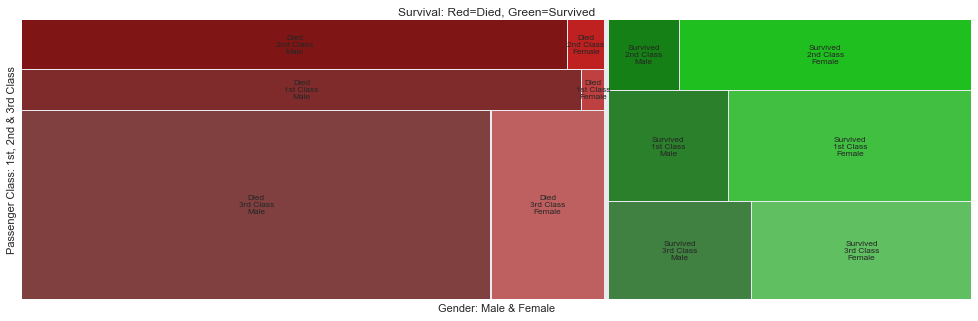

In [13]:
# Mosaic Chart
plt.rc('figure', figsize=(17, 5))
from statsmodels.graphics.mosaicplot import mosaic
mosaic(titanic_df,['Survival', 'Class', 'Gender'], axes_label=False, title='Survival: Red=Died, Green=Survived')
plt.xlabel('Gender: Male & Female')
plt.ylabel('Passenger Class: 1st, 2nd & 3rd Class')
plt.show()

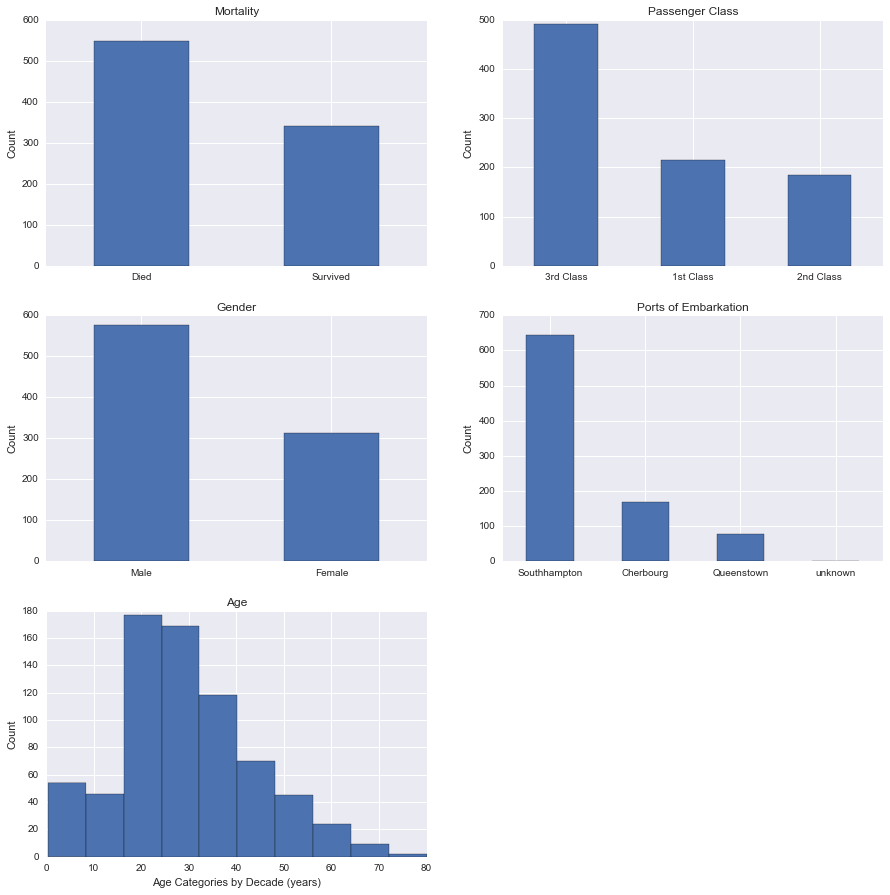

In [14]:
# Figure size
plt.rc('figure', figsize=(15, 15))
# Histogram bin size
bin_size = 10

# Setup a figue of plots
#fig = plt.figure() 
fig_size = (3, 2)

# Plot mortality counts
plt.subplot2grid(fig_size, (0, 0))
titanic_df['Survival'].value_counts().plot(kind='bar', title='Mortality')
plt.xticks(rotation=0)
plt.ylabel('Count')

# Plot Pclass counts
plt.subplot2grid(fig_size, (0, 1))
titanic_df['Class'].value_counts().plot(kind='bar', title='Passenger Class')
plt.xticks(rotation=0)
plt.ylabel('Count')

# Plot Gender counts
plt.subplot2grid(fig_size, (1, 0))
titanic_df['Gender'].value_counts().plot(kind='bar', title='Gender')
plt.xticks(rotation=0)
plt.ylabel('Count')

# Plot Port counts
plt.subplot2grid(fig_size, (1, 1))
titanic_df['Ports'].value_counts().plot(kind='bar', title='Ports of Embarkation')
plt.xticks(rotation=0)
plt.ylabel('Count')

# Plot Age histogram
plt.subplot2grid(fig_size, (2, 0))
titanic_df['Age'].hist()
plt.title('Age')
plt.ylabel('Count')
plt.xlabel('Age Categories by Decade (years)')

[Back to top](#Top of document)
<a id='age'></a>

## Age

In [15]:
# Passangers with no age
ageisnull = titanic_df[titanic_df['Age'].isnull()]
ageisnull.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Numeric,Survival,Class,Gender,Ports
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,Died,3rd Class,Male,Queenstown
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,1,Survived,2nd Class,Male,Southhampton
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,0,Survived,3rd Class,Female,Cherbourg
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,1,Died,3rd Class,Male,Cherbourg
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,0,Survived,3rd Class,Female,Queenstown


In [16]:
print('Total passengers with no age: ', len(ageisnull))

Total passengers with no age:  177


In the [Dataset Exploration](#dataexp) section, it was determined there were only 714 of 891 valid age related records.  We can see there are 177 NaN entries for Age.

In [17]:
# Mean age
titanic_df['Age'].mean()

29.69911764705882

In [18]:
# Mean age by Sex
(titanic_df.groupby(['Gender']))['Age'].mean()

Gender
Female    27.915709
Male      30.726645
Name: Age, dtype: float64

In [19]:
# Mean age by Pclass and Sex
(titanic_df.groupby(['Class', 'Gender']))['Age'].mean()

Class      Gender
1st Class  Female    34.611765
           Male      41.281386
2nd Class  Female    28.722973
           Male      30.740707
3rd Class  Female    21.750000
           Male      26.507589
Name: Age, dtype: float64

In [20]:
# Mean age by Pclass, Survived and Sex
(titanic_df.groupby(['Class', 'Survival', 'Gender']))['Age'].mean()

Class      Survival  Gender
1st Class  Died      Female    25.666667
                     Male      44.581967
           Survived  Female    34.939024
                     Male      36.248000
2nd Class  Died      Female    36.000000
                     Male      33.369048
           Survived  Female    28.080882
                     Male      16.022000
3rd Class  Died      Female    23.818182
                     Male      27.255814
           Survived  Female    19.329787
                     Male      22.274211
Name: Age, dtype: float64

In [21]:
# General statistics of Age by Class, Survival and Gender
(titanic_df.groupby(['Class', 'Survival', 'Gender']))['Age'].describe()

Class      Survival  Gender       
1st Class  Died      Female  count      3.000000
                             mean      25.666667
                             std       24.006943
                             min        2.000000
                             25%       13.500000
                             50%       25.000000
                             75%       37.500000
                             max       50.000000
                     Male    count     61.000000
                             mean      44.581967
                             std       14.457749
                             min       18.000000
                             25%       33.000000
                             50%       45.500000
                             75%       56.000000
                             max       71.000000
           Survived  Female  count     82.000000
                             mean      34.939024
                             std       13.223014
                             min  

In [22]:
# Survival count by Sex, Pclass and Age < 20
sex = titanic_df['Gender']
survived = titanic_df['Survival']
pclass = titanic_df['Class']
age_youth = titanic_df['Age'] < 20

pd.crosstab([sex, pclass, age_youth], survived)

Survival                Died  Survived
Gender Class     Age                  
Female 1st Class False     2        78
                 True      1        13
       2nd Class False     6        54
                 True      0        16
       3rd Class False    51        48
                 True     21        24
Male   1st Class False    74        41
                 True      3         4
       2nd Class False    82         7
                 True      9        10
       3rd Class False   249        35
                 True     51        12

A decision is required to determine the best method of dealing with NaN values.
* The NaN values can be ignored
* NaN can be filled in with a value, typically a mean
    * Comparing the counts for various groups leads to the conclusion, simply using the overall mean will heavily weigh one specific age and skew any age dependant results.
    * For the remainder of this analytic process, the NaN values data will be replaced with a mean age based upon Pclass, Survived and Sex.

In [23]:
# Maintain Age and create Age_Fill (populate missing ages)
titanic_df['Age_Fill'] = titanic_df['Age']

# Populate Age_Fill
titanic_df['Age_Fill'] = titanic_df['Age_Fill'] \
    .groupby([titanic_df['Pclass'], titanic_df['Survived'], titanic_df['Sex']]) \
    .apply(lambda x: x.fillna(x.mean()))

Create a new category called Age_Fill and fill NaN with an age based upon the mean of Pclass, Survived and Sex.

In [24]:
# Example of Age_Fill - #5, 17 & 19
print(titanic_df['Age'].head(20))
print(titanic_df['Age_Fill'].head(20))

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5      NaN
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17     NaN
18    31.0
19     NaN
Name: Age, dtype: float64
0     22.000000
1     38.000000
2     26.000000
3     35.000000
4     35.000000
5     27.255814
6     54.000000
7      2.000000
8     27.000000
9     14.000000
10     4.000000
11    58.000000
12    20.000000
13    39.000000
14    14.000000
15    55.000000
16     2.000000
17    16.022000
18    31.000000
19    19.329787
Name: Age_Fill, dtype: float64


[Back to top](#Top of document)
<a id='age_hist'></a>

## Age Histogram Comparison

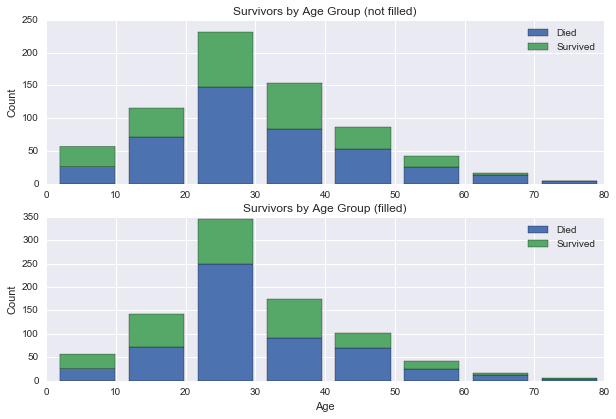

In [25]:
# Set figure size
plt.rc('figure', figsize=(10, 10))

# Setup a figue of plots

df1 = titanic_df[titanic_df['Survived'] == 0]['Age']
df2 = titanic_df[titanic_df['Survived'] == 1]['Age']
df3 = titanic_df[titanic_df['Survived'] == 0]['Age_Fill']
df4 = titanic_df[titanic_df['Survived'] == 1]['Age_Fill']

plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Age Group')
plt.xlabel('Age')
plt.ylabel('Count')

max_age = max(titanic_df['Age_Fill'])

plt.subplot(311)
plt.hist([df1, df2], 
             bins=8, 
             range=(1, max_age), 
             stacked=True)

plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Age Group (not filled)')
plt.ylabel('Count')

plt.subplot(312)
plt.hist([df3, df4], 
             bins=8, 
             range=(1, max_age), 
             stacked=True)

plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Age Group (filled)')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

In [26]:
# Maximum age
titanic_df['Age'].max()

80.0

In [27]:
# Create a new column that has all ages by bin category: 0-10:10, 10-20:20, 20-30:30, 30-40:40
# 40-50:50, 50-60:60, 60-70:70, 70-80:80
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
group_names = [10, 20, 30, 40, 50, 60, 70, 80]

titanic_df['Age_Categories'] = pd.cut(titanic_df['Age_Fill'], bins, labels=group_names)

titanic_df[['Age', 'Age_Fill', 'Age_Categories']].head()

,Age,Age_Fill,Age_Categories
0,22.0,22.0,30
1,38.0,38.0,40
2,26.0,26.0,30
3,35.0,35.0,40
4,35.0,35.0,40


In [28]:
titanic_df['Age_Categories'] = pd.to_numeric(titanic_df['Age_Categories'])

An Age_Categories column has been inserted into the dataframe to simplify certain visualizations and calculations, as there are to many individual ages to easily draw conclusions or see patterns.

In [29]:
# Survival Count by Age_Categories
titanic_df.groupby('Survival')[['Age_Categories']].count()

,Age_Categories
Survival,
Died,549
Survived,342


[Back to top](#Top of document)
<a id='age_mosaic'></a>

## Age Mosaic

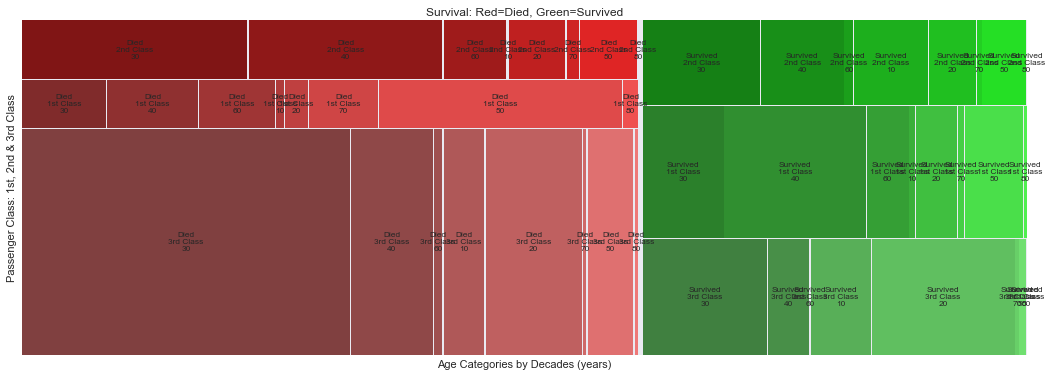

In [30]:
# Mosaic Plot
plt.rc('figure', figsize=(18, 6)) # figure size
from statsmodels.graphics.mosaicplot import mosaic
mosaic(titanic_df,['Survival', 'Class', 'Age_Categories'], axes_label=False, title='Survival: Red=Died, Green=Survived')
plt.xlabel('Age Categories by Decades (years)')
plt.ylabel('Passenger Class: 1st, 2nd & 3rd Class')
plt.show()

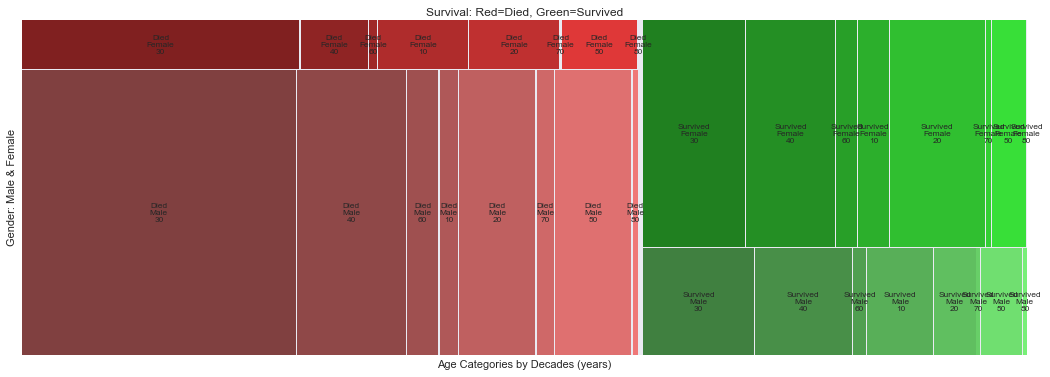

In [31]:
# Mosaic Plot
mosaic(titanic_df,['Survival', 'Gender', 'Age_Categories'], axes_label=False, title='Survival: Red=Died, Green=Survived')
plt.xlabel('Age Categories by Decades (years)')
plt.ylabel('Gender: Male & Female')
plt.show()

[Back to top](#Top of document)
<a id='pclass'></a>

## Pclass

In [32]:
# Survival count by Pclass
pclass_ct = titanic_df.groupby('Class')['Survival'].value_counts().unstack()
pclass_ct

Survival,Died,Survived
Class,,
1st Class,80,136
2nd Class,97,87
3rd Class,372,119


In [33]:
# Survival Rate
titanic_df.groupby('Class')['Survival'].value_counts(normalize = True).unstack()

Survival,Died,Survived
Class,,
1st Class,0.370370,0.629630
2nd Class,0.527174,0.472826
3rd Class,0.757637,0.242363


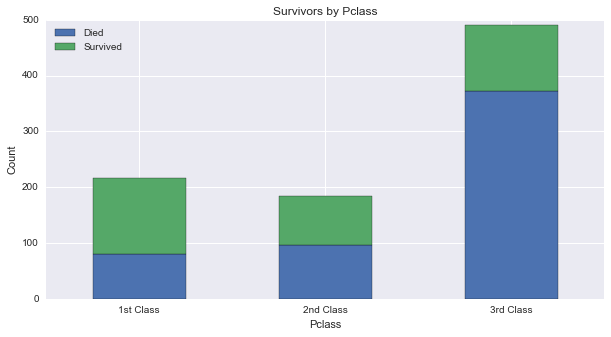

In [34]:
# Set figure size
plt.rc('figure', figsize=(10, 5))

# Setup a figue of plots

pclass_ct.plot(kind='bar',
               stacked=True)

plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()

Pclass is not a strong indicator for surviving, however 3rd Class is a stong indicator for dying.

[Back to top](#Top of document)
<a id='sex'></a>

## Sex

In [35]:
# Survival count by sex
sex_ct = titanic_df.groupby('Gender')['Survival'].value_counts().unstack()
sex_ct

Survival,Died,Survived
Gender,,
Female,81,233
Male,468,109


In [36]:
# Survival rate by sex
titanic_df.groupby('Gender')['Survival'].value_counts(normalize = True).unstack()

Survival,Died,Survived
Gender,,
Female,0.257962,0.742038
Male,0.811092,0.188908


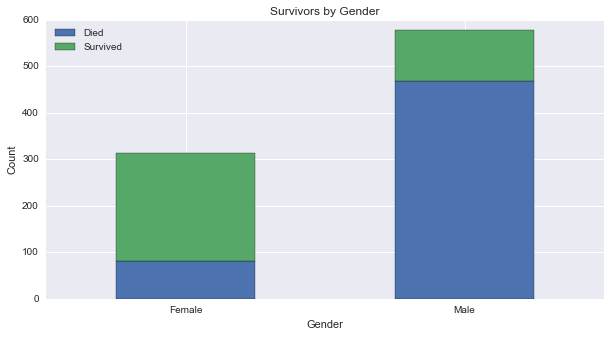

In [37]:
plt.rc('figure', figsize=(10, 5))

sex_ct.plot(kind='bar',
               stacked=True)

plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()

Gender is a strong indicator for survivability, with a significant portion of females (74%) surviving and males 81% dying.

[Back to top](#Top of document)
<a id='embarked'></a>

## Embarked

In [38]:
# Survival count by Embarked

embarked_ct = titanic_df.groupby('Ports')['Survival'].value_counts().unstack()
embarked_ct

Survival,Died,Survived
Ports,,
Cherbourg,75.0,93.0
Queenstown,47.0,30.0
Southhampton,427.0,217.0
unknown,NaN,2.0


In [39]:
# Survival rate by embarked
titanic_df.groupby('Ports')['Survival'].value_counts(normalize = True).unstack()

Survival,Died,Survived
Ports,,
Cherbourg,0.446429,0.553571
Queenstown,0.610390,0.389610
Southhampton,0.663043,0.336957
unknown,NaN,1.000000


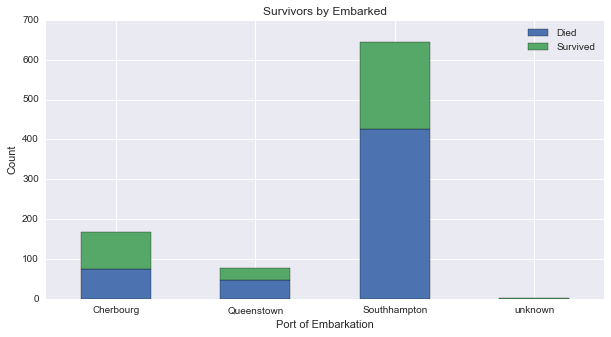

In [40]:
plt.rc('figure', figsize=(10, 5))

embarked_ct.plot(kind='bar',
               stacked=True)

plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Embarked')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()

[Back to top](#Top of document)
<a id='statistics'></a>

## Statistics

In [41]:
# Survival count by Sex, Embarked_Numeric, Pclass and Age Category
embarked = titanic_df['Ports']
sex = titanic_df['Gender']
survived = titanic_df['Survival']
pclass = titanic_df['Class']
age_cat = titanic_df['Age_Categories']
pd.crosstab([sex, embarked, pclass], [survived, age_cat])

Survival                      Died                           Survived          \
Age_Categories                  10  20   30  40  50 60 70 80       10  20  30   
Gender Ports        Class                                                       
Female Cherbourg    1st Class    0   0    0   0   1  0  0  0        0   5  10   
                    2nd Class    0   0    0   0   0  0  0  0        1   2   4   
                    3rd Class    1   3    3   0   1  0  0  0        5   8   2   
       Queenstown   1st Class    0   0    0   0   0  0  0  0        0   0   0   
                    2nd Class    0   0    0   0   0  0  0  0        0   0   2   
                    3rd Class    0   1    5   3   0  0  0  0        0  23   1   
       Southhampton 1st Class    1   0    1   0   0  0  0  0        0   8  10   
                    2nd Class    0   0    3   1   1  1  0  0        7   6  21   
                    3rd Class   10   8   25   5   7  0  0  0        6   7  13   
       unknown      1st Class    0   0    0   0   0  0  0  0        0   0   0   
Male   Cherbourg    1st Class    0   1    6   3   8  4  1  2        0   1   5   
                    2nd Class    0   0    4   4   0  0  0  0        1   1   0   
                    3rd Class    0   4   23   5   1  0  0  0        1   3   6   
       Queenstown   1st Class    0   0    0   0   1  0  0  0        0   0   0   
                    2nd Class    0   0    0   0   0  1  0  0        0   0   0   
                    3rd Class    4   1   25   3   1  0  1  1        0   0   3   
       Southhampton 1st Class    0   2    4   9  22  6  8  0        2   1   4   
                    2nd Class    0   9   29  26   8  8  2  0        8   2   0   
                    3rd Class   10  42  120  34  18  5  1  1        7   4  14   

Survival                                       
Age_Categories                 40 50 60 70 80  
Gender Ports        Class                      
Female Cherbourg    1st Class  14  7  6  0  0  
                    2nd Class   0  0  0  0  0  
                    3rd Class   0  0  0  0  0  
       Queenstown   1st Class   1  0  0  0  0  
                    2nd Class   0  0  0  0  0  
                    3rd Class   0  0  0  0  0  
       Southhampton 1st Class  17  5  5  1  0  
                    2nd Class  16  9  2  0  0  
                    3rd Class   6  0  0  1  0  
       unknown      1st Class   1  0  0  1  0  
Male   Cherbourg    1st Class   6  3  2  0  0  
                    2nd Class   0  0  0  0  0  
                    3rd Class   0  0  0  0  0  
       Queenstown   1st Class   0  0  0  0  0  
                    2nd Class   0  0  0  0  0  
                    3rd Class   0  0  0  0  0  
       Southhampton 1st Class  12  6  2  0  1  
                    2nd Class   3  1  0  1  0  
                    3rd Class   7  2  0  0  0

### OLS Regression Models

In [42]:
import statsmodels.formula.api as sm

In [43]:
# OLS modeling for Survived and Gender
result_1 = sm.ols(formula='Survived ~ Gender', data=titanic_df).fit()
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     372.4
Date:                Wed, 09 Nov 2016   Prob (F-statistic):           1.41e-69
Time:                        21:17:21   Log-Likelihood:                -466.09
No. Observations:                 891   AIC:                             936.2
Df Residuals:                     889   BIC:                             945.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          0.7420      0.023     32.171      0.000         0.697     0.787
Gender[T.Male]    -0.5531      0.029    -19.298      0.000        -0.609    -0.497
==============================================================================
Omnibus:                       25.424   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.169
Skew:                           0.427   Prob(JB):                     1.26e-06
Kurtosis:                       2.963   Cond. No.                         3.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# OLS modeling for Survived and Class
result_2 = sm.ols(formula='Survived ~ Class', data=titanic_df).fit()
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     57.96
Date:                Wed, 09 Nov 2016   Prob (F-statistic):           2.18e-24
Time:                        21:17:22   Log-Likelihood:                -567.30
No. Observations:                 891   AIC:                             1141.
Df Residuals:                     888   BIC:                             1155.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              0.6296      0.031     20.198      0.000         0.568     0.691
Class[T.2nd Class]    -0.1568      0.046     -3.412      0.001        -0.247    -0.067
Class[T.3rd Class]    -0.3873      0.037    -10.353      0.000        -0.461    -0.314
==============================================================================
Omnibus:                     1364.423   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.840
Skew:                           0.421   Prob(JB):                     1.39e-19
Kurtosis:                       1.723   Cond. No.                         4.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# OLS modeling for Survived and Ports
result_3 = sm.ols(formula='Survived ~ Ports', data=titanic_df).fit()
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     10.18
Date:                Wed, 09 Nov 2016   Prob (F-statistic):           1.34e-06
Time:                        21:17:22   Log-Likelihood:                -606.87
No. Observations:                 891   AIC:                             1222.
Df Residuals:                     887   BIC:                             1241.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                 0.5536      0.037     14.972      0.000         0.481     0.626
Ports[T.Queenstown]      -0.1640      0.066     -2.486      0.013        -0.293    -0.035
Ports[T.Southhampton]    -0.2166      0.042     -5.218      0.000        -0.298    -0.135
Ports[T.unknown]          0.4464      0.341      1.310      0.191        -0.223     1.115
==============================================================================
Omnibus:                       31.157   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.483
Skew:                           0.478   Prob(JB):                     1.03e-29
Kurtosis:                       1.362   Cond. No.                         26.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# OLS modeling for Survived and Age_Fill
result_4 = sm.ols(formula='Survived ~ Age_Fill', data=titanic_df).fit()
result_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     7.998
Date:                Wed, 09 Nov 2016   Prob (F-statistic):            0.00479
Time:                        21:17:23   Log-Likelihood:                -617.97
No. Observations:                 891   AIC:                             1240.
Df Residuals:                     889   BIC:                             1250.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.4847      0.039     12.372      0.000         0.408     0.562
Age_Fill      -0.0034      0.001     -2.828      0.005        -0.006    -0.001
==============================================================================
Omnibus:                       30.779   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.594
Skew:                           0.474   Prob(JB):                     2.42e-32
Kurtosis:                       1.262   Cond. No.                         77.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# OLS modeling for Survived and Gender + Class + Age_Fill + Ports
result_5 = sm.ols(formula='Survived ~ Gender + Class + Age_Fill + Ports', data=titanic_df).fit()
result_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     83.64
Date:                Wed, 09 Nov 2016   Prob (F-statistic):           3.69e-93
Time:                        21:17:23   Log-Likelihood:                -395.35
No. Observations:                 891   AIC:                             806.7
Df Residuals:                     883   BIC:                             845.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                 1.1928      0.051     23.260      0.000         1.092     1.293
Gender[T.Male]           -0.4758      0.028    -17.243      0.000        -0.530    -0.422
Class[T.2nd Class]       -0.1777      0.041     -4.366      0.000        -0.258    -0.098
Class[T.3rd Class]       -0.3939      0.036    -10.818      0.000        -0.465    -0.322
Ports[T.Queenstown]      -0.0104      0.055     -0.191      0.849        -0.118     0.097
Ports[T.Southhampton]    -0.0777      0.034     -2.254      0.024        -0.145    -0.010
Ports[T.unknown]          0.1316      0.271      0.486      0.627        -0.400     0.663
Age_Fill                 -0.0065      0.001     -6.091      0.000        -0.009    -0.004
==============================================================================
Omnibus:                       36.566   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.062
Skew:                           0.514   Prob(JB):                     2.00e-09
Kurtosis:                       3.156   Cond. No.                         689.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# OLS modeling for Survived and Gender + Class + Age_Fill
result_6 = sm.ols(formula='Survived ~ Gender + Class + Age_Fill', data=titanic_df).fit()
result_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     144.0
Date:                Wed, 09 Nov 2016   Prob (F-statistic):           7.26e-95
Time:                        21:17:24   Log-Likelihood:                -398.78
No. Observations:                 891   AIC:                             807.6
Df Residuals:                     886   BIC:                             831.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              1.1573      0.048     23.887      0.000         1.062     1.252
Gender[T.Male]        -0.4845      0.027    -17.708      0.000        -0.538    -0.431
Class[T.2nd Class]    -0.2033      0.039     -5.184      0.000        -0.280    -0.126
Class[T.3rd Class]    -0.4069      0.035    -11.747      0.000        -0.475    -0.339
Age_Fill              -0.0066      0.001     -6.200      0.000        -0.009    -0.005
==============================================================================
Omnibus:                       34.024   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.990
Skew:                           0.494   Prob(JB):                     9.28e-09
Kurtosis:                       3.143   Cond. No.                         157.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# Dataframe for statistical data
comp_index_4 = 'Gender + Class + Age_Fill + Ports'
comp_index_3 = 'Gender + Class + Age_Fill'

statistics_df = pd.DataFrame(
    data=[[result_1.rsquared_adj, np.sqrt(result_1.rsquared_adj)],
          [result_2.rsquared_adj, np.sqrt(result_2.rsquared_adj)],
          [result_3.rsquared_adj, np.sqrt(result_3.rsquared_adj)],
          [result_4.rsquared_adj, np.sqrt(result_4.rsquared_adj)],
          [result_5.rsquared_adj, np.sqrt(result_5.rsquared_adj)],
          [result_6.rsquared_adj, np.sqrt(result_6.rsquared_adj)]],
    index=['Gender', 'Class', 'Ports', 'Age_Fill', comp_index_4, comp_index_3],
    columns=['R-squared', 'Correlation to Survival']
)

statistics_df

,R-squared,Correlation to Survival
Gender,0.294438,0.542621
Class,0.113484,0.336873
Ports,0.030031,0.173294
Age_Fill,0.007802,0.088329
Gender + Class + Age_Fill + Ports,0.393939,0.627645
Gender + Class + Age_Fill,0.391324,0.625559


Ordinary least squares (OLS) regression modeling has been used to determine which metric or combination of metrics provides the best prediction of survival.  As can be determined by reviewing the coefficient of determination (R-squared), the individual models for Ports and Age_Fill indicate a large proportion of variance for survival.  Gender and a combination of metrics are better models.  The square root of R-squared equals the Pearson correlation coefficient of predicted to actual values; Gender is the single metric with the strongest correlation.  However, the combination of metrics, Gender + Class + Age_Fill + Ports, shows the strongest correlation to survival for the model used.

[Back to top](#Top of document)